In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

## Data load and Preprocessing

In [46]:
#read the data
bike_ds = pd.read_csv('day.csv')
bike_ds.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [47]:
### Remove redundant column 'instant', 'dteday','casual', 'registered'

bike_ds_prep = bike_ds[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','cnt']]

In [48]:
bike_ds_prep.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Map below columns to original value
1) season
2) mnth
3) weekday
4) weathersit

In [49]:
season= {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
month= {1:'Jan', 2:'Feb', 3:'March', 4:'April', 5:'May',6:'June',7:'July',8:'Aug',9:'September',10:'Oct',11:'November',12:'Dec'}
wday= {0:'Sunday',1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday',6:'Saturday'}
weathersit= {1:'Clear', 2:'Mist', 3:'Light_rain_snow', 4:'Heavy_Rain'}

In [50]:
bike_ds_prep['mnth'] = bike_ds_prep['mnth'].map(month)
bike_ds_prep['weekday'] = bike_ds_prep['weekday'].map(wday)
bike_ds_prep['season'] = bike_ds_prep['season'].map(season)

C:\Users\akhil\AppData\Local\Temp/ipykernel_24332/3448741092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_ds_prep['mnth'] = bike_ds_prep['mnth'].map(month)
C:\Users\akhil\AppData\Local\Temp/ipykernel_24332/3448741092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_ds_prep['weekday'] = bike_ds_prep['weekday'].map(wday)
C:\Users\akhil\AppData\Local\Temp/ipykernel_24332/3448741092.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [51]:
bike_ds_prep['weathersit'] = bike_ds_prep['weathersit'].map(weathersit)

C:\Users\akhil\AppData\Local\Temp/ipykernel_24332/2772205402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_ds_prep['weathersit'] = bike_ds_prep['weathersit'].map(weathersit)


In [52]:
bike_ds_prep.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [29]:
bike_ds_prep.weekday.unique()

array(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

In [30]:
bike_ds_prep.mnth.unique()

array(['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug',
       'September', 'Oct', 'November', 'Dec'], dtype=object)

In [31]:
bike_ds_prep.season.unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [41]:
bike_ds_prep.weathersit.unique()

array([2, 1, 3], dtype=int64)

## EDA

In [53]:
bike_ds_prep.shape

(730, 12)

In [54]:
bike_ds_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [55]:
bike_ds_prep.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000
windspeed,730.0,12.763620,5.195841,1.500244,9.041650,12.125325,15.625589,34.000021
cnt,730.0,4508.006849,1936.011647,22.000000,3169.750000,4548.500000,5966.000000,8714.000000


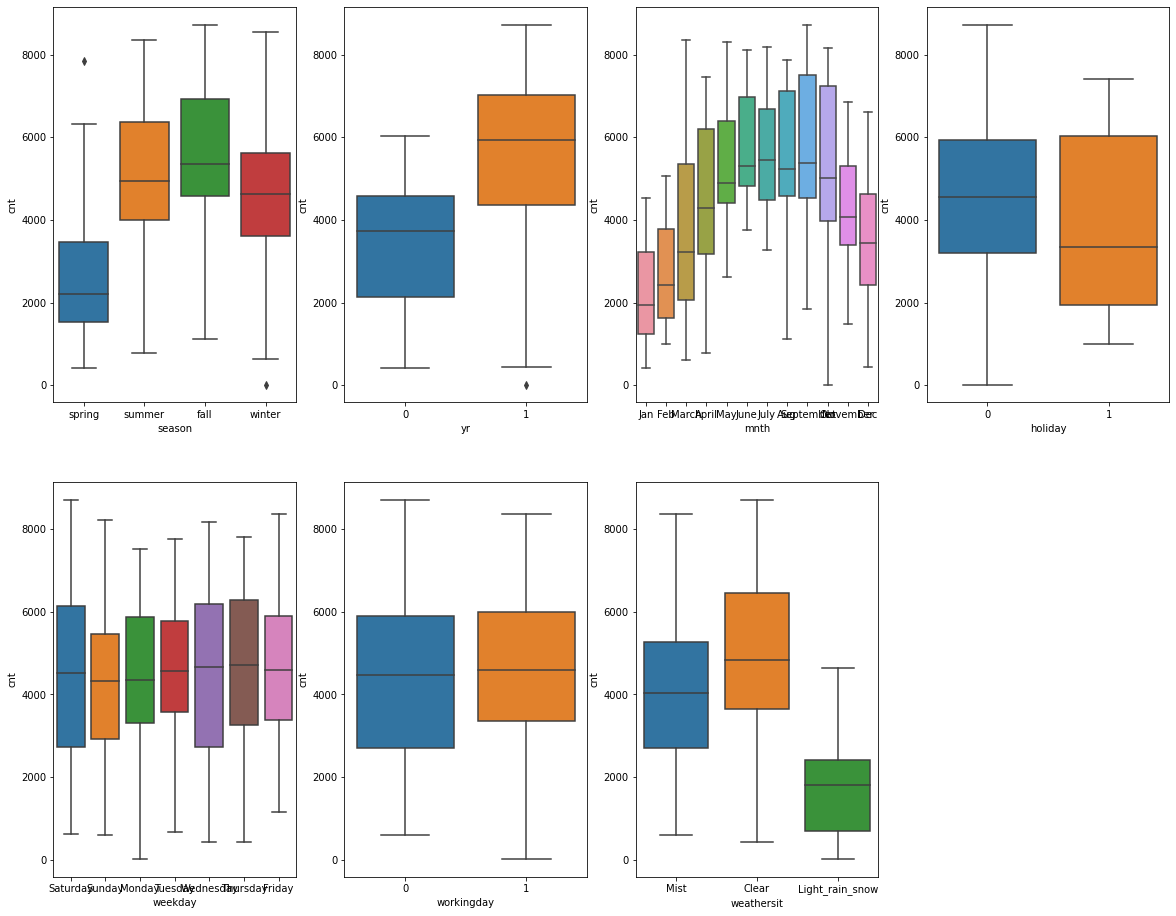

In [56]:
# visualize categorical variable
plt.figure(figsize=(20,16))
plt.subplot(2,4,1)
sns.boxplot(x='season',y='cnt',data=bike_ds_prep)
plt.subplot(2,4,2)
sns.boxplot(x='yr',y='cnt',data=bike_ds_prep)
plt.subplot(2,4,3)
sns.boxplot(x='mnth',y='cnt',data=bike_ds_prep)
plt.subplot(2,4,4)
sns.boxplot(x='holiday',y='cnt',data=bike_ds_prep)
plt.subplot(2,4,5)
sns.boxplot(x='weekday',y='cnt',data=bike_ds_prep)
plt.subplot(2,4,6)
sns.boxplot(x='workingday',y='cnt',data=bike_ds_prep)
plt.subplot(2,4,7)
sns.boxplot(x='weathersit',y='cnt',data=bike_ds_prep)
plt.show()

### Observation
1) min max range is higest in fall season.
2) median of cnt of ride is maximum in clear weather.
3) in 2019 the demand of bike was more as compared to 2018.

In [57]:
num_var = ['temp','hum','atemp','windspeed','cnt']

In [58]:
bike_num_var= bike_ds_prep[num_var]

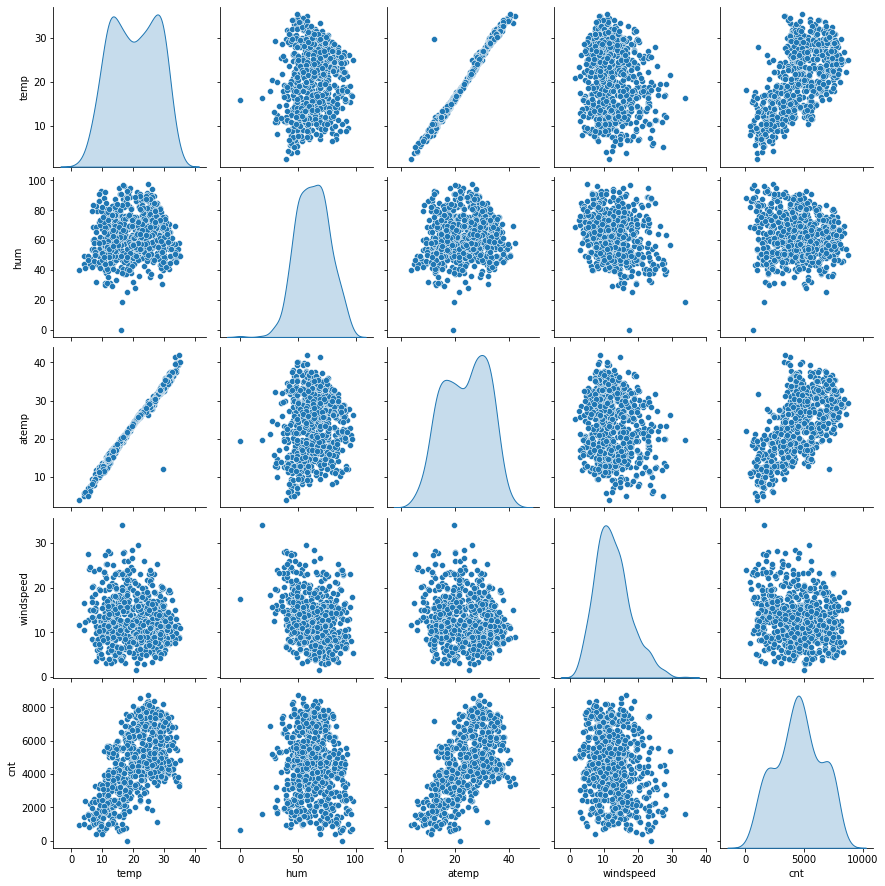

In [59]:
# Create a new dataframe of only numeric variables:
sns.pairplot(bike_num_var, diag_kind='kde')
plt.show()

### Observation:
temp and cnt are more corelated.

### Split data into train and test

In [60]:
bike_final = bike_ds_prep.copy()

In [61]:
mnth = pd.get_dummies(bike_final['mnth'],drop_first=True,dtype='uint8')
wday = pd.get_dummies(bike_final['weekday'],drop_first=True,dtype='uint8')
season = pd.get_dummies(bike_final['season'],drop_first=True,dtype='uint8')
weathersit = pd.get_dummies(bike_final['weathersit'],drop_first=True,dtype='uint8')


In [62]:
# Add the results to the original housing dataframe
bike_final_1 = pd.concat([bike_final, mnth, wday, season, weathersit], axis = 1)


In [63]:
bike_final_1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,spring,summer,winter,Light_rain_snow,Mist
0,spring,0,Jan,0,Saturday,0,Mist,14.110847,18.18125,80.5833,...,1,0,0,0,0,1,0,0,0,1
1,spring,0,Jan,0,Sunday,0,Mist,14.902598,17.68695,69.6087,...,0,1,0,0,0,1,0,0,0,1
2,spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,1,0,0,0,0
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,1,0,0,0,0
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,1,0,0,0,0


In [64]:
bike_final_2= bike_final_1.drop(['mnth','weekday','weathersit','season'],axis=1)

In [65]:
bike_final_2.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'March', 'May',
       'November', 'Oct', 'September', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'spring', 'summer', 'winter',
       'Light_rain_snow', 'Mist'],
      dtype='object')

In [66]:
df_train,df_test = train_test_split(bike_final_2, train_size=0.7,random_state=100)

In [67]:
num_vars = ['temp','atemp','hum','windspeed','cnt']

In [68]:
scaler = MinMaxScaler()

In [69]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,spring,summer,winter,Light_rain_snow,Mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,1,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,1,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,0,1


In [70]:
y_train = df_train.pop('cnt')
X_train = df_train

### Building Model

In [71]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [72]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm,n_features_to_select=15,step=1)
rfe = rfe.fit(X_train, y_train)

In [73]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 9),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('July', True, 1),
 ('June', False, 13),
 ('March', False, 15),
 ('May', False, 7),
 ('November', False, 3),
 ('Oct', False, 12),
 ('September', True, 1),
 ('Monday', False, 8),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 11),
 ('Tuesday', False, 10),
 ('Wednesday', False, 14),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light_rain_snow', True, 1),
 ('Mist', True, 1)]

In [74]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'July',
       'September', 'Saturday', 'Sunday', 'spring', 'summer', 'winter',
       'Light_rain_snow', 'Mist'],
      dtype='object')

In [75]:
X_train.columns[~rfe.support_]

Index(['atemp', 'Aug', 'Dec', 'Feb', 'Jan', 'June', 'March', 'May', 'November',
       'Oct', 'Monday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [76]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'March', 'May', 'November',
       'Oct', 'September', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'spring', 'summer', 'winter', 'Light_rain_snow',
       'Mist'],
      dtype='object')

In [77]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [78]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [79]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [80]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Mon, 12 Jun 2023   Prob (F-statistic):          2.11e-191
Time:                        08:17:51   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1995      0.028     

In [81]:
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

In [82]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [83]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [84]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Mon, 12 Jun 2023   Prob (F-statistic):          2.11e-191
Time:                        08:18:24   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1811      0.042     

In [85]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,114.08
2,workingday,9.07
8,Saturday,6.06
9,Sunday,5.74
10,spring,5.02
3,temp,3.62
12,winter,3.49
11,summer,2.62
4,hum,1.91
14,Mist,1.57


In [86]:
X_train_new = X_train_new.drop(["const"], axis = 1)

In [87]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)


In [88]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Mon, 12 Jun 2023   Prob (F-statistic):          2.11e-191
Time:                        08:19:10   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1811      0.042     

In [89]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,32.10
2,temp,18.99
1,workingday,18.41
4,windspeed,4.91
7,Saturday,4.91
9,spring,4.80
8,Sunday,4.76
11,winter,3.69
10,summer,3.04
13,Mist,2.31


In [90]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [91]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Mon, 12 Jun 2023   Prob (F-statistic):          1.28e-188
Time:                        08:21:22   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1008      0.038     

In [92]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,16.19
2,temp,12.74
3,windspeed,4.76
6,Saturday,4.45
7,Sunday,4.21
8,spring,3.82
10,winter,2.78
9,summer,2.76
0,yr,2.07
4,July,1.60


In [93]:
X_train_new = X_train_new.drop(["workingday"], axis = 1)

In [94]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Mon, 12 Jun 2023   Prob (F-statistic):          2.06e-186
Time:                        08:22:32   Log-Likelihood:                 500.18
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     497   BIC:                            -919.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2003      0.030     

In [95]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.18
2,windspeed,4.62
8,summer,2.24
7,spring,2.11
0,yr,2.07
9,winter,1.82
3,July,1.59
11,Mist,1.55
4,September,1.33
5,Saturday,1.22


In [106]:
X_train_new = X_train_new.drop(["Saturday"], axis = 1)

In [107]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Mon, 12 Jun 2023   Prob (F-statistic):          3.37e-187
Time:                        08:28:10   Log-Likelihood:                 499.22
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     498   BIC:                            -923.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2034      0.030     

In [108]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.14
2,windspeed,4.60
7,summer,2.23
6,spring,2.09
0,yr,2.07
8,winter,1.80
3,July,1.59
10,Mist,1.55
4,September,1.33
5,Sunday,1.17


### Residual Analysis of the train data

In [118]:
y_train_cnt = lm.predict(X_train_lm)

In [119]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\akhil\AppData\Local\Temp/ipykernel_24332/2756863869.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_cnt), bins = 20)


Text(0.5, 0, 'Errors')

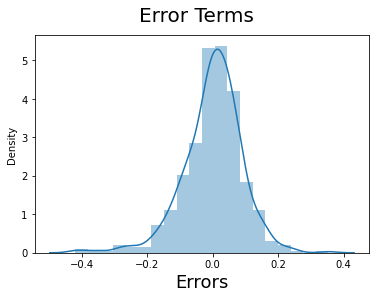

In [120]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Observation:
    error terms are normally distributed.

### Making Predictions

In [109]:
num_var_test = ['temp','atemp','hum','windspeed','cnt']
df_test_pred= df_test.copy()
df_test_pred[num_var_test] = scaler.transform(df_test_pred[num_var_test])

In [110]:
y_test = df_test_pred.pop('cnt')
X_test = df_test_pred
df_test_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 184 to 653
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               220 non-null    int64  
 1   holiday          220 non-null    int64  
 2   workingday       220 non-null    int64  
 3   temp             220 non-null    float64
 4   atemp            220 non-null    float64
 5   hum              220 non-null    float64
 6   windspeed        220 non-null    float64
 7   Aug              220 non-null    uint8  
 8   Dec              220 non-null    uint8  
 9   Feb              220 non-null    uint8  
 10  Jan              220 non-null    uint8  
 11  July             220 non-null    uint8  
 12  June             220 non-null    uint8  
 13  March            220 non-null    uint8  
 14  May              220 non-null    uint8  
 15  November         220 non-null    uint8  
 16  Oct              220 non-null    uint8  
 17  September        22

In [111]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 184 to 653
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   const            220 non-null    float64
 1   yr               220 non-null    int64  
 2   temp             220 non-null    float64
 3   windspeed        220 non-null    float64
 4   July             220 non-null    uint8  
 5   September        220 non-null    uint8  
 6   Sunday           220 non-null    uint8  
 7   spring           220 non-null    uint8  
 8   summer           220 non-null    uint8  
 9   winter           220 non-null    uint8  
 10  Light_rain_snow  220 non-null    uint8  
 11  Mist             220 non-null    uint8  
dtypes: float64(3), int64(1), uint8(8)
memory usage: 10.3 KB


In [373]:
col1

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'July', 'September',
       'Saturday', 'Sunday', 'summer', 'winter', 'Light_rain_snow', 'Mist'],
      dtype='object')

In [112]:
y_pred = lm.predict(X_test_lm6)

### Observation: Bewlo are the features used in final model.
 1   yr               
 2   temp             
 3   windspeed       
 4   July             
 5   September         
 6   Sunday             
 7   spring             
 8   summer           
 9   winter           
 10  Light_rain_snow  
 11  Mist 

### Model Evaluation

Text(0, 0.5, 'y_pred')

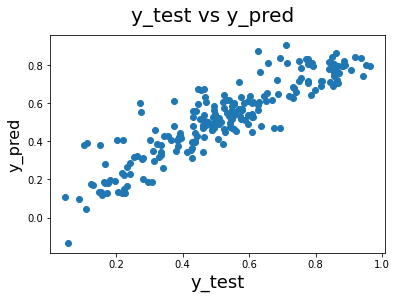

In [113]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [114]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8057616301094371

In [115]:
r2=.8057616301094371

In [116]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7954894086248401

### Observation:
    r2 of train data is 0.836
    r2 of test data is 0.0805
    adjusted r2 is 0.795
    Prob (F-statistic) is 3.37e-187

In [117]:
lm.params

const              0.203387
yr                 0.233876
temp               0.491742
windspeed         -0.149694
July              -0.048253
September          0.072321
Sunday            -0.044959
spring            -0.068197
summer             0.047885
winter             0.081830
Light_rain_snow   -0.284654
Mist              -0.080237
dtype: float64

### Top 3 features
#### temp : 0.491742
#### weatersit as "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds": -0.284654
#### yr : 0.233876